# **Paint with Words**
___

[github](https://github.com/cloneofsimo/paint-with-words-sd)

# **Installation**

installing huggingface accelerate is preferred if on free colab GPU runtime

In [1]:
!pip install -q accelerate git+https://github.com/cloneofsimo/paint-with-words-sd.git

     |████████████████████████████████| 175 kB 15.6 MB/s 
     |████████████████████████████████| 304 kB 66.6 MB/s 
     |████████████████████████████████| 5.5 MB 61.1 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 163 kB 60.2 MB/s 
     |████████████████████████████████| 7.6 MB 53.2 MB/s 


In [2]:
from paint_with_words import paint_with_words
from paint_with_words.utils import fig_from_settings
from PIL import Image
from pathlib import Path
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# HuggingFace Token

grab from here: [huggingface/tokens](https://huggingface.co/settings/tokens)

if you don't have access to StableDiffusion v1.4, accept from here: [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4)

if you don't have access to StableDiffusion v1.5, accept from here: [runwayml/stable-diffusion-v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5)

In [3]:
token = 'paste_token_here'
os.environ['HF_TOKEN'] = token

___

# Segmentation Map and Prompt

format: `(r,g,b): "{label},{strength}"`

it's recommended if the labels in context are present in the prompt as well.

example segmentation map:

In [4]:
input_img = Path('/content/example_input.png')
output_img = Path('/content/example_output.png')

In [5]:
!wget https://github.com/cloneofsimo/paint-with-words-sd/raw/master/contents/example_input.png

--2022-11-15 16:31:08--  https://github.com/cloneofsimo/paint-with-words-sd/raw/master/contents/example_input.png
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cloneofsimo/paint-with-words-sd/master/contents/example_input.png [following]
--2022-11-15 16:31:09--  https://raw.githubusercontent.com/cloneofsimo/paint-with-words-sd/master/contents/example_input.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2832 (2.8K) [image/png]
Saving to: ‘example_input.png’

example_input.png   100%[===================>]   2.77K  --.-KB/s    in 0s      

2022-11-15 16:31:09 (47.1 MB/s) - ‘example_input.png

# **Configuration**

In [6]:
model_options = {
    'v1.4': 'CompVis/stable-diffusion-v1-4', # default
    'v1.5': 'runwayml/stable-diffusion-v1-5'
}

In [7]:
settings = {
    "model": model_options['v1.4'],
    "input_prompt": "realistic photo of a dog, cat, tree, with beautiful sky, on sandy ground",
    "color_context": {
        (0, 0, 0): "cat,1.5",
        (255, 255, 255): "dog,2.5",
        (13, 255, 0): "tree,1.5",
        (90, 206, 255): "sky,0.3",
        (74, 18, 1): "ground,0.2",
    },
    "color_map_img_path": input_img,
    "output_img_path": output_img,
    "seed": 42
}

# Custom Weight Function


In [8]:
w_f = lambda w, sigma, qk: 0.5 * w * math.log(1 + sigma**2) * qk.std()

# Open Image and Get Contexts and Prompt

In [9]:
color_map_image = Image.open(settings["color_map_img_path"]).convert("RGB")
color_context = settings["color_context"]
input_prompt = settings["input_prompt"]

# **Run model**

download will take a while

you can play around with different seeds, models, inference steps, guidance scale and even the weight function.

In [10]:
img = paint_with_words(
    seed = settings['seed'],
    hf_model_path = settings['model'],
    color_context = color_context,
    color_map_image = color_map_image,
    input_prompt = input_prompt,
    num_inference_steps= 45,
    guidance_scale= 7.5,
    device= "cuda:0",
    weight_function = w_f,
)

CompVis/stable-diffusion-v1-4


Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/905 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.14.self_attn.v_proj.weight', 'vision_model.encoder.layers.7.self_attn.v_proj.weight', 'vision_model.encoder.layers.18.layer_norm2.bias', 'vision_model.encoder.layers.0.layer_norm1.weight', 'vision_model.encoder.layers.22.mlp.fc2.bias', 'vision_model.encoder.layers.11.layer_norm2.weight', 'vision_model.encoder.layers.10.self_attn.out_proj.weight', 'vision_model.encoder.layers.22.mlp.fc2.weight', 'vision_model.encoder.layers.16.self_attn.out_proj.weight', 'vision_model.encoder.layers.4.self_attn.q_proj.weight', 'vision_model.encoder.layers.2.mlp.fc1.weight', 'vision_model.encoder.layers.1.self_attn.q_proj.bias', 'vision_model.encoder.layers.21.mlp.fc2.weight', 'vision_model.encoder.layers.0.self_attn.out_proj.bias', 'vision_model.encoder.layers.3.mlp.fc1.weight', 'vision_model.encoder.layers.21.mlp.fc2.bias', 'vision_model.embeddings.patch_emb

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

  0%|          | 0/45 [00:00<?, ?it/s]

# Result

In [17]:
img.save(settings["output_img_path"])

In [12]:
def display_image(cf=None):
    input_path = cf['color_map_img_path']
    output_path = cf['output_img_path']
    input_img = Image.open(input_path).convert("RGB")
    output_img = Image.open(output_path).convert("RGB")
    plt.rcParams['figure.figsize'] = (8, 4)
    plt.rcParams['figure.dpi'] = 120
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f"{cf['model']} - {cf['input_prompt']}")
    ax1.axis('off')
    ax1.imshow(input_img)
    ax2.axis('off')
    ax2.imshow(output_img)
    plt.show()
    plt.close()

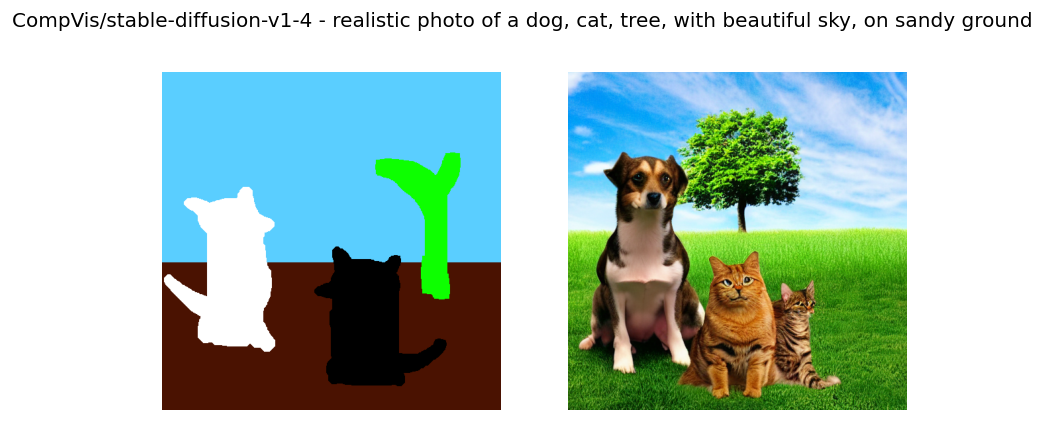

In [13]:
display_image(settings)

___

# **Model Comparison**

In [14]:
!wget https://github.com/cloneofsimo/paint-with-words-sd/raw/master/contents/input_examples/A%20rabbit%20mage%20standing%20on%20clouds%20casting%20a%20fireball.png -O rabbit-fireball.png

--2022-11-15 16:33:48--  https://github.com/cloneofsimo/paint-with-words-sd/raw/master/contents/input_examples/A%20rabbit%20mage%20standing%20on%20clouds%20casting%20a%20fireball.png
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cloneofsimo/paint-with-words-sd/master/contents/input_examples/A%20rabbit%20mage%20standing%20on%20clouds%20casting%20a%20fireball.png [following]
--2022-11-15 16:33:48--  https://raw.githubusercontent.com/cloneofsimo/paint-with-words-sd/master/contents/input_examples/A%20rabbit%20mage%20standing%20on%20clouds%20casting%20a%20fireball.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

In [15]:
base_dir = Path('/content/')

prompt = "rabbit mage standing on clouds casting a fireball, highly detailed, digital art"
color_map = Image.open(base_dir / 'rabbit-fireball.png').convert("RGB")
contexts = {
            (138, 48, 39): "rabbit mage,1.5",
            (50, 32, 211): "fireball,0.8",
            (126, 200, 100): "clouds,1.2",
           }

CompVis/stable-diffusion-v1-4


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.14.self_attn.v_proj.weight', 'vision_model.encoder.layers.7.self_attn.v_proj.weight', 'vision_model.encoder.layers.18.layer_norm2.bias', 'vision_model.encoder.layers.0.layer_norm1.weight', 'vision_model.encoder.layers.22.mlp.fc2.bias', 'vision_model.encoder.layers.11.layer_norm2.weight', 'vision_model.encoder.layers.10.self_attn.out_proj.weight', 'vision_model.encoder.layers.22.mlp.fc2.weight', 'vision_model.encoder.layers.16.self_attn.out_proj.weight', 'vision_model.encoder.layers.4.self_attn.q_proj.weight', 'vision_model.encoder.layers.2.mlp.fc1.weight', 'vision_model.encoder.layers.1.self_attn.q_proj.bias', 'vision_model.encoder.layers.21.mlp.fc2.weight', 'vision_model.encoder.layers.0.self_attn.out_proj.bias', 'vision_model.encoder.layers.3.mlp.fc1.weight', 'vision_model.encoder.layers.21.mlp.fc2.bias', 'vision_model.embeddings.patch_emb

  0%|          | 0/45 [00:00<?, ?it/s]

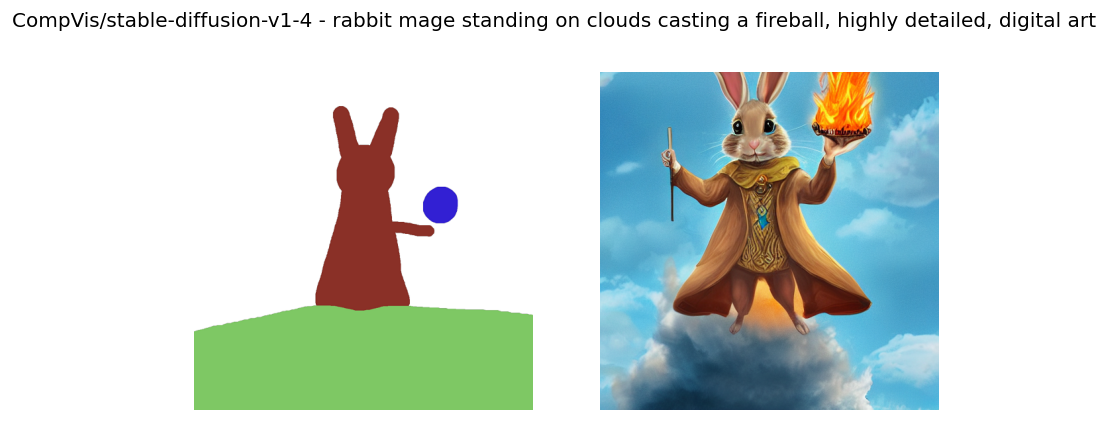

runwayml/stable-diffusion-v1-5


Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.14.self_attn.v_proj.weight', 'vision_model.encoder.layers.7.self_attn.v_proj.weight', 'vision_model.encoder.layers.18.layer_norm2.bias', 'vision_model.encoder.layers.0.layer_norm1.weight', 'vision_model.encoder.layers.22.mlp.fc2.bias', 'vision_model.encoder.layers.11.layer_norm2.weight', 'vision_model.encoder.layers.10.self_attn.out_proj.weight', 'vision_model.encoder.layers.22.mlp.fc2.weight', 'vision_model.encoder.layers.16.self_attn.out_proj.weight', 'vision_model.encoder.layers.4.self_attn.q_proj.weight', 'vision_model.encoder.layers.2.mlp.fc1.weight', 'vision_model.encoder.layers.1.self_attn.q_proj.bias', 'vision_model.encoder.layers.21.mlp.fc2.weight', 'vision_model.encoder.layers.0.self_attn.out_proj.bias', 'vision_model.encoder.layers.3.mlp.fc1.weight', 'vision_model.encoder.layers.21.mlp.fc2.bias', 'vision_model.embeddings.patch_emb

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

  0%|          | 0/45 [00:00<?, ?it/s]

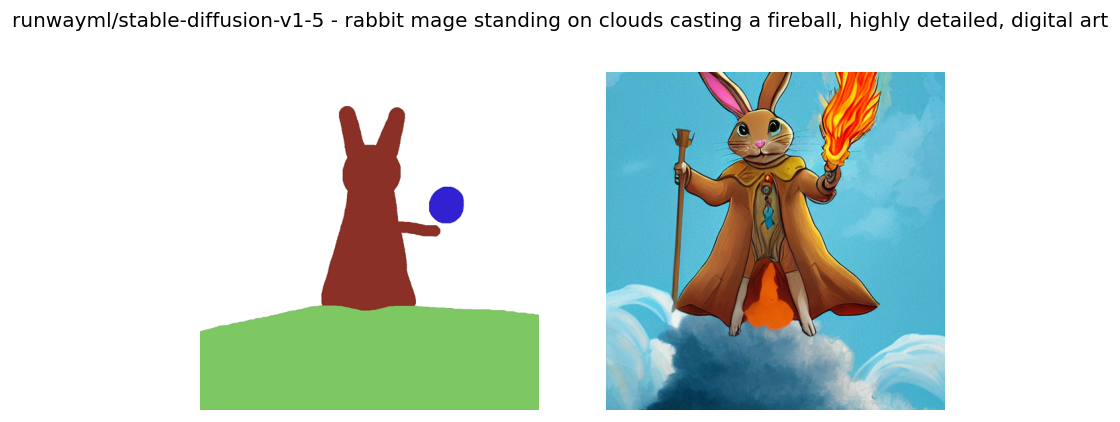

In [16]:
for model in model_options.keys():
    config = {
        "model": model_options[model],
        "input_prompt": prompt,
        "color_context": contexts,
        "color_map_img_path": base_dir / 'rabbit-fireball.png',
        "output_img_path": str(base_dir) + model + '_output.png',
        "seed": 42
    }
    gen_img = paint_with_words(
        seed = config['seed'],
        hf_model_path = config['model'],
        color_context = contexts,
        color_map_image = color_map,
        input_prompt = prompt,
        num_inference_steps= 45,
        guidance_scale= 7.5,
        device= "cuda:0",
        weight_function = w_f,
    )
    gen_img.save(config["output_img_path"])
    display_image(config)